# Data Analysis and Visualization
Data wrangling was done before and we have all the data in 1 consolidated file for all the years together for different types of file.
Now I will try to visualize them in different ways and try to answer few questions which will be interesting to unravel the hidden wealth of information.
The merged files which were created in the previous workbook, are below:
1. merged_benefits.csv
2. merged_plan_attribute.csv
3. merged_rate.csv

At first we will analyse the datasets individually and then we will try to merge them. After that we will analyse the datasets together.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pylab import rcParams
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = None


In [2]:
#Lets start analysing the Rate dataset
rate = pd.read_csv('merged_rate.csv')

In [3]:
rate.head(2)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,0,2014,AK,21989,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,1,2014,AK,21989,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56


In [4]:
#Dropping the Unnamed column
rate.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
Age_tobaco_rate = rate[rate['Age'] != 'Family Option'][['Age','IndividualRate','Tobacco','IndividualTobaccoRate']].groupby(['Age','Tobacco']).mean().unstack()

**The below graph suggests, as age increases the rate difference will be higher between Tobacco user Individual rate and Tobacco user Individual tobacco rate**

The premium rate for Tobacco user is more than double of Non Tobacco user. This is a good incentive for living a healthy life.

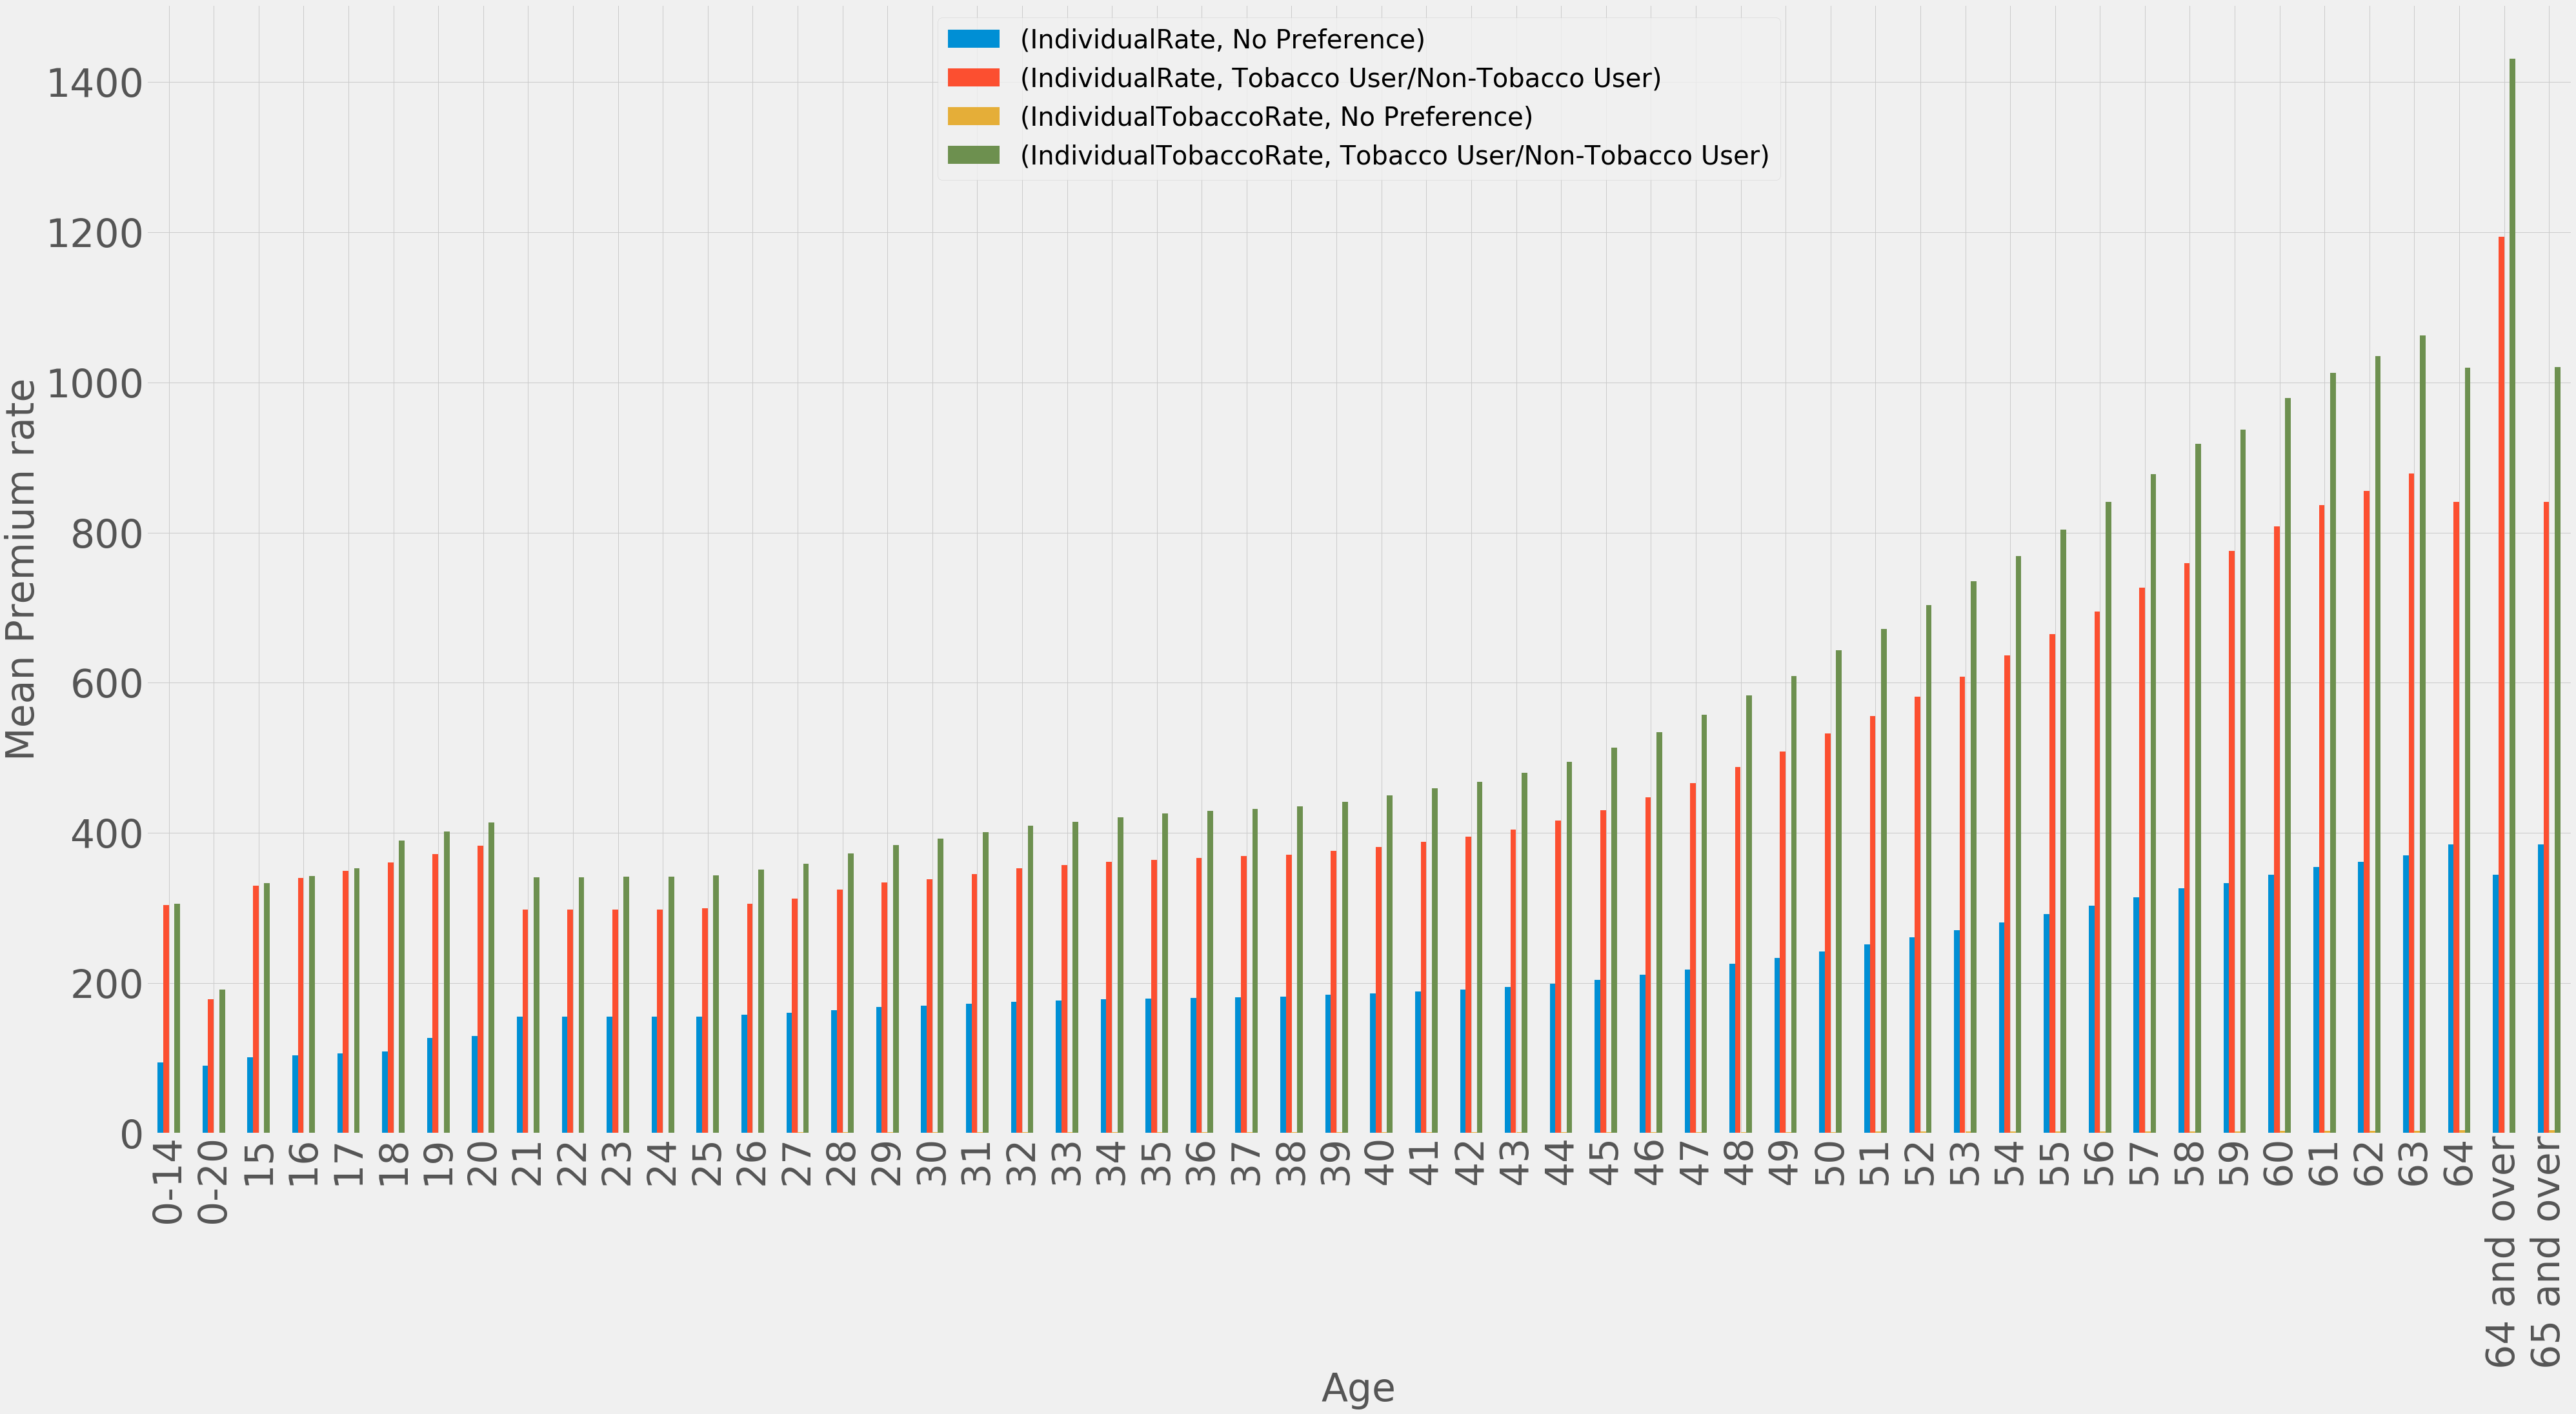

In [7]:
Age_tobaco_rate.plot(kind='bar',figsize=(60,30), fontsize=60,sort_columns=True,legend=True)
plt.ylabel('Mean Premium rate', fontsize=60)
plt.xlabel('Age', fontsize=60)
plt.legend(fontsize=40,loc='upper center')

# How are plans being offered in the subsequent years ?
# As the Years gone by the number of plans offered in the marketplace decreasing significantly

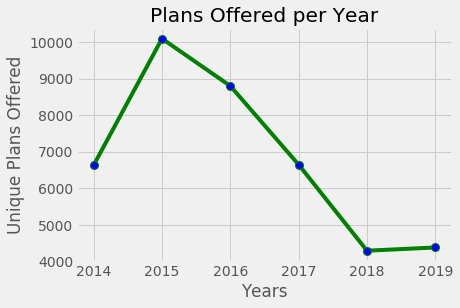

<Figure size 432x288 with 0 Axes>

In [8]:
#Collecting the Unique PlanID for all the years of enrollment
plan_year = {year:len(rate[rate['BusinessYear'] == year]['PlanId'].unique()) for year in rate['BusinessYear'].unique()}
#Plot the Year-Plan to check how the number of plans ooffered every year
plt.plot(pd.Series(plan_year),color='green',marker='o',markerfacecolor='blue',markersize=8)
plt.xlabel('Years')
plt.ylabel('Unique Plans Offered')
plt.title('Plans Offered per Year')
plt.show()
plt.savefig('Plans Offered Per year.png')

# Individual rates variations with Ages in all years
In the year 2014 to 2017, there was one group of 0-20 age. But from 2018 the age group is reduced to 0-14 and Kids older than 14 are covered differently.
Also we can see that upper limit of age is changed from '64 and Above' to '65 and above' after 2018.

In [9]:
rate_age_year = rate[rate['Age'] !='Family Option'].groupby(['Age','BusinessYear'])['IndividualRate'].mean().unstack()

In [10]:
print(rate_age_year)

BusinessYear        2014        2015        2016        2017        2018  \
Age                                                                        
0-14                 NaN         NaN         NaN         NaN  147.409295   
0-20          121.203857  119.549427  125.056699  118.695596         NaN   
15                   NaN         NaN         NaN         NaN  159.029600   
16                   NaN         NaN         NaN         NaN  163.476105   
17                   NaN         NaN         NaN         NaN  167.921789   
18                   NaN         NaN         NaN         NaN  172.702030   
19                   NaN         NaN         NaN         NaN  188.922321   
20                   NaN         NaN         NaN         NaN  193.830350   
21            207.650534  200.313842  200.774853  194.395039  209.587770   
22            207.725442  200.381726  200.834500  194.437239  209.667595   
23            207.814646  200.461573  200.905728  194.485253  209.760551   
24          

# Average premium mostly remains same throughout the years. 
# Premium increases with increase in Age, which is norm in health Insurance industry 

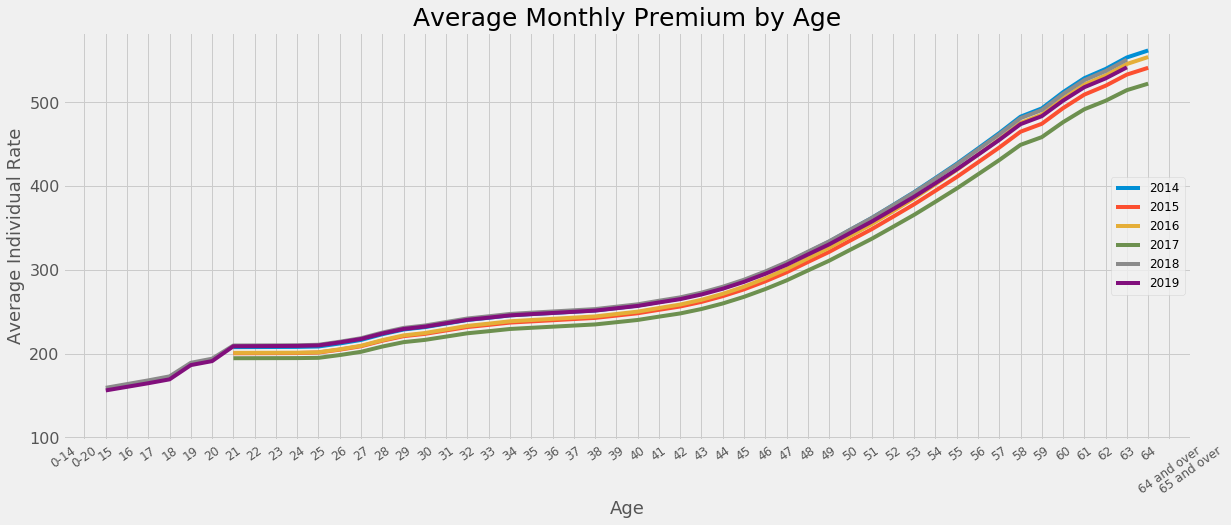

<Figure size 432x288 with 0 Axes>

In [11]:
# ploting the age and average monthly individual rate relationship in subsequent years
rate_age_year.plot(figsize=(18,7), fontsize=16)
plt.title("Average Monthly Premium by Age", fontsize=25)
plt.ylabel("Average Individual Rate", fontsize=18)
plt.xlabel('Age',fontsize=18)
#Xticks are not comin auto in current version of Pandas, so need to work around on it
plt.xticks(list(range(len(rate_age_year.index))),rate_age_year.index, fontsize=12,rotation=35)
plt.legend(fontsize=12,loc='right')
plt.show()
plt.savefig('Average Monthly Premium by Age.png')

In [12]:
#Calculate the Family weighted rate 
rate['family_weighted_rate']  = (rate['IndividualRate'] + rate['PrimarySubscriberAndOneDependent']/2 + 
                                rate['PrimarySubscriberAndTwoDependents']/3 +
                                rate['PrimarySubscriberAndThreeOrMoreDependents']/4+
                                rate['Couple']/2+
                                rate['CoupleAndOneDependent']/3 +
                                rate['CoupleAndTwoDependents']/4 +
                                rate['CoupleAndThreeOrMoreDependents']/5)/8
family_rate_age_year = rate[rate['Age'] =='Family Option'].groupby(['BusinessYear'])['family_weighted_rate'].mean()

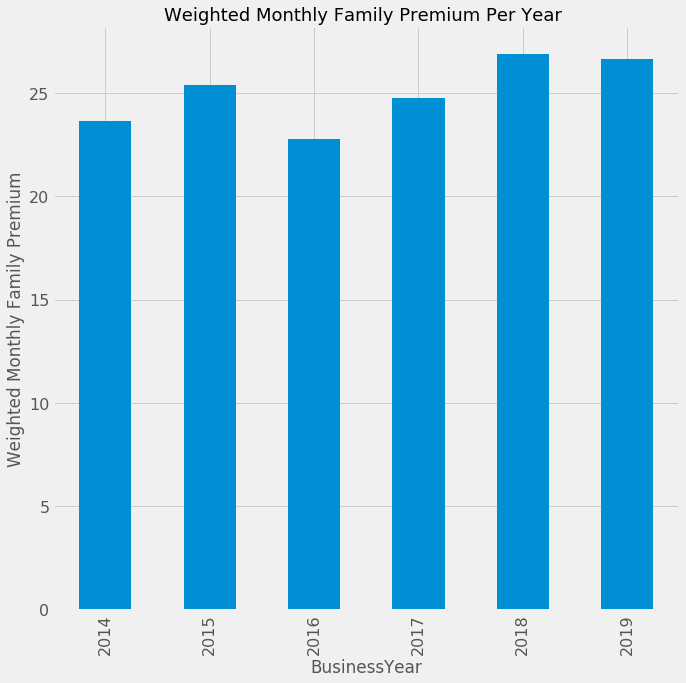

<Figure size 432x288 with 0 Axes>

In [14]:
# ploting the age and average monthly individual rate relationship
family_rate_age_year.plot(kind='bar',figsize=(10,10), fontsize=16)
plt.title("Weighted Monthly Family Premium Per Year ", fontsize=18)
plt.ylabel('Weighted Monthly Family Premium')
plt.show()
plt.savefig('Weighted Monthly family Premium.png')
#The weighted monthly premium is increasing in 2018 and 2019 

# State rate analysis
# There are 50 states in America. Are the individual rates same in so many states? We can check by boxplot below:

# Observation:
1. Out of 50 states only 40 states have participated in this exchange program
2. There are big differences between the states. It's clear that the individual rates in AK and IL are very high.
3. The Median of AK is also very high, which means that there are no Plans which comes cheaper in this state
4. TN and TX are the more reasonable states with regards to Individual Plans 

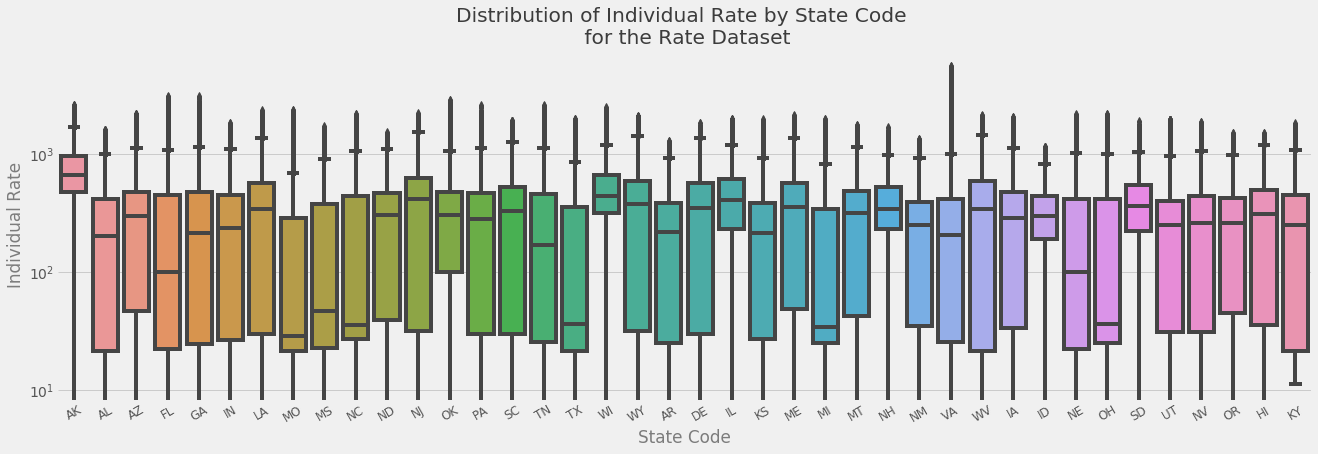

In [15]:
data = rate[(rate['Age']!='Family Option')]
fig = plt.figure(1, figsize=(20, 6))
ax = sns.boxplot(x="StateCode", y="IndividualRate", data=data)
sns.despine(left=True, bottom=True)
ax.set(yscale="log")
plt.xticks(rotation=30,fontsize=12)
plt.ylabel('Individual Rate', alpha=0.75)
plt.xlabel('State Code', alpha=0.75)
plt.title('Distribution of Individual Rate by State Code \n for the Rate Dataset', alpha=0.75)
plt.savefig('Distribution of Individual Rate by State Code for the Rate Dataset.png')

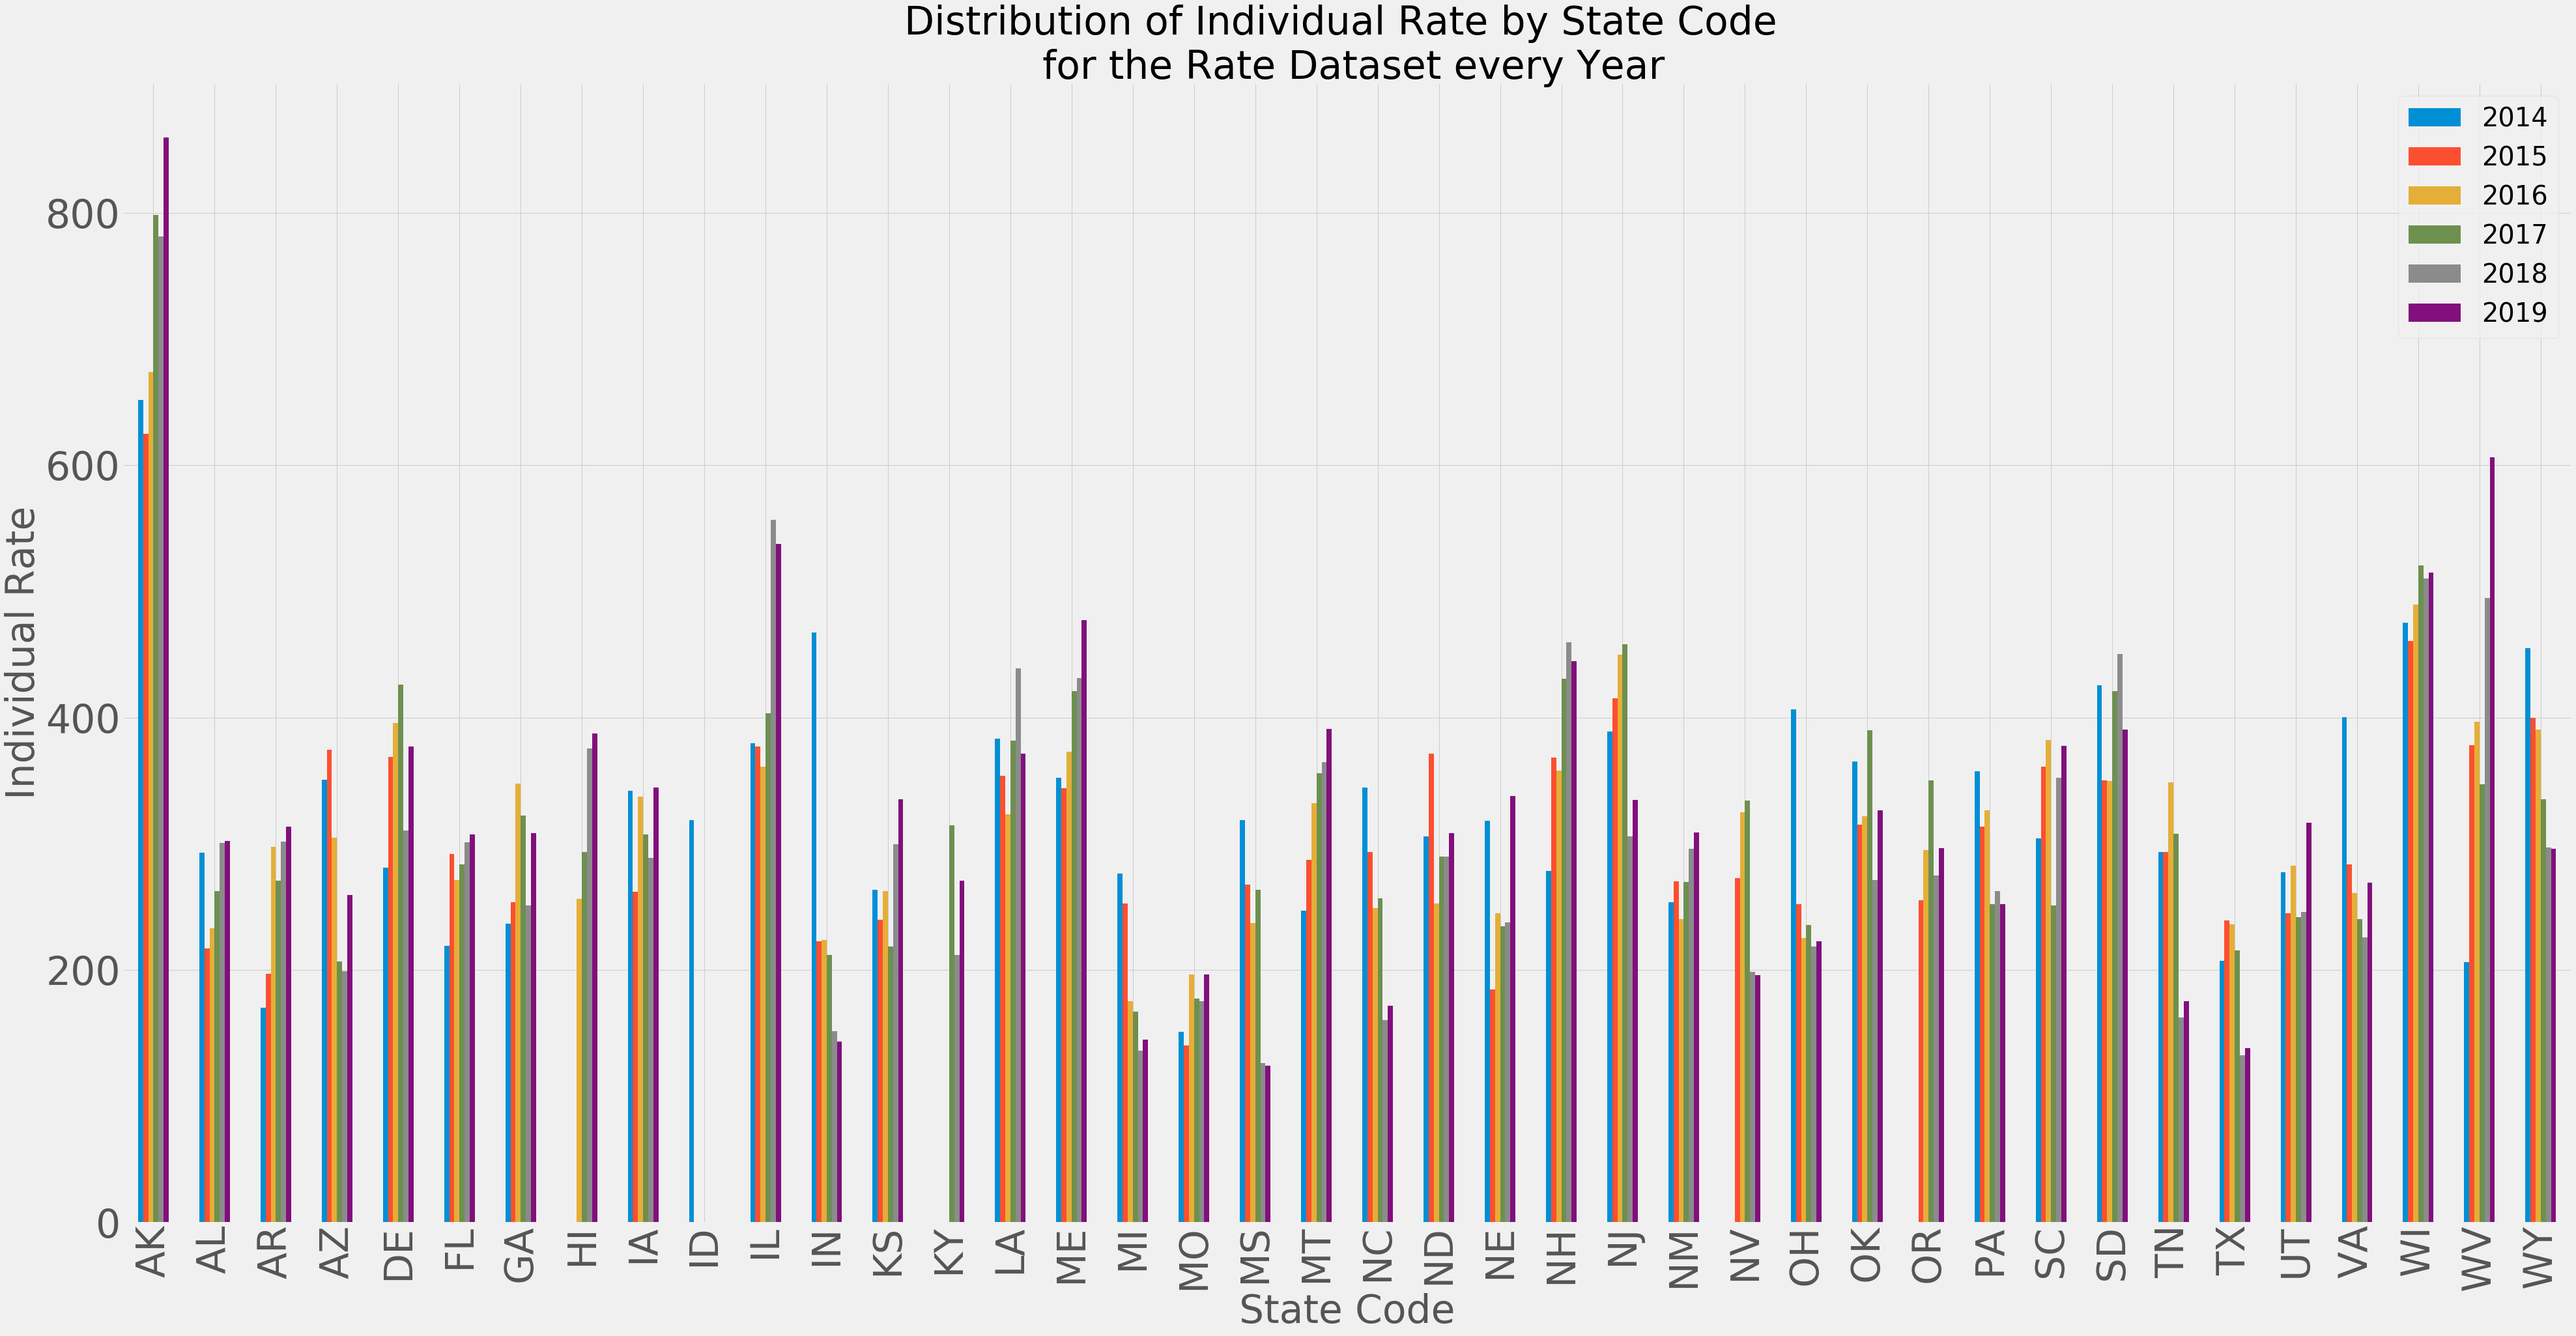

In [16]:
# Mean Individual rate per state code per year also tells the same story 
# AK is always a very expensive state
# IL is again expensive as compare to other states
#WY is becoming expensive in 2019

data= rate[(rate['Age']!='Family Option')][['BusinessYear','StateCode','IndividualRate']]
avg_rate_year_state = data.groupby(['StateCode','BusinessYear'])['IndividualRate'].mean().unstack()
ax = avg_rate_year_state.plot(kind='bar',figsize=(60,30), fontsize=60,sort_columns=True,legend=True)
plt.ylabel('Individual Rate', fontsize=60)
plt.xlabel('State Code', fontsize=60)
plt.legend(fontsize=40,loc='upper right')
plt.title('Distribution of Individual Rate by State Code \n for the Rate Dataset every Year', fontsize=60)
plt.savefig('Distribution of Individual Rate by State Code for the Rate Dataset every Year.png')

# Why these few states are so expensive than other states

We will see the distribution of plans accross the states and see which state offers maximum and minimum number of plans

# Observations
1. Florida has maximum numbers of plans offerings for the population
2. AK, IL and WY have very less offerings for the plan.
3. We can see some negative co-relation with Number of plans offered with monthly premium in a State

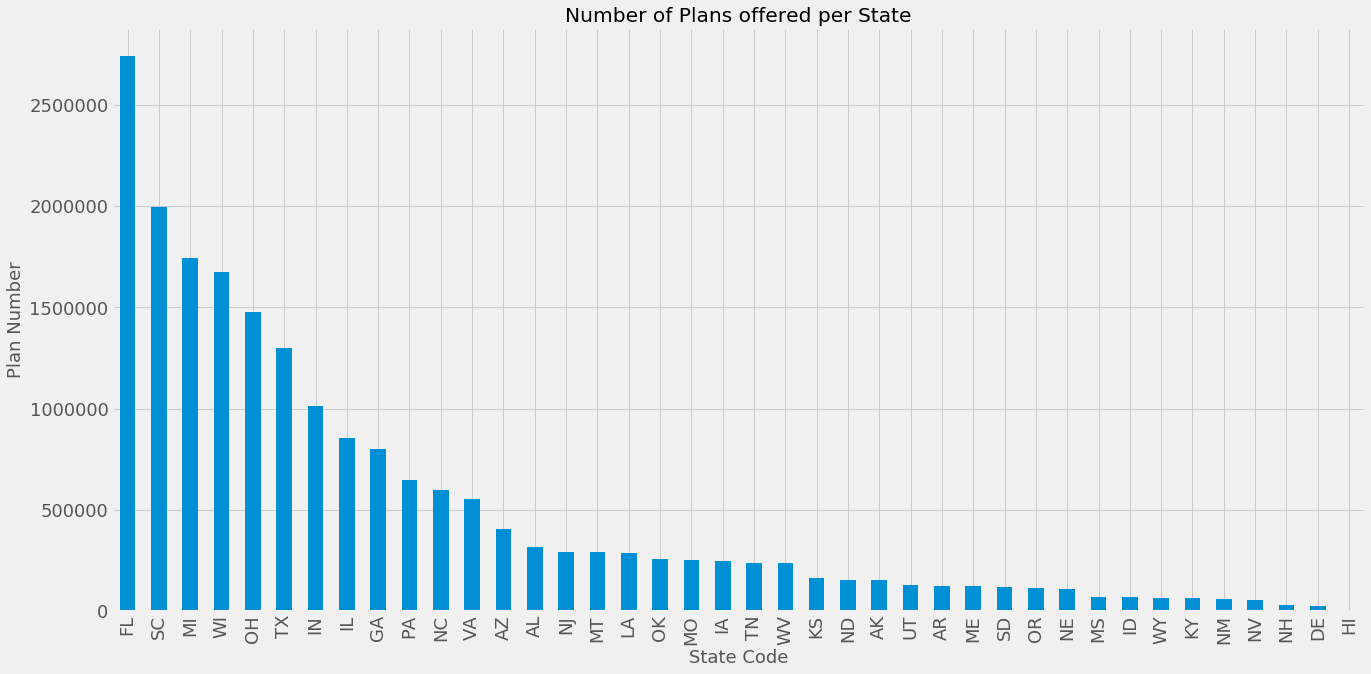

In [17]:
plans_grouped = rate[rate['Age']!='Family Option']['PlanId'].groupby(rate['StateCode'])
plans_grouped.count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.ylabel('Plan Number', fontsize=18)
plt.xlabel('State Code', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Number of Plans offered per State')
plt.savefig('Number of Plans offered per State.png')

# Visualization of Plan Attribute data

In [18]:
#Load the merged & cleaned Plan attribute Dataset
plan_attr = pd.read_csv('merged_plan_attribute.csv')

In [19]:
plan_attr.drop('Unnamed: 0',axis=1,inplace=True)
plan_attr[(plan_attr['MetalLevel'] != 'Low') & (plan_attr['MetalLevel'] != 'High')].head()

,BusinessYear,StateCode,PlanId,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetIndividualMOOP
6,2014,AK,73836AK0650002-00,Bronze,6350.0,0.0,12700.0
7,2014,AK,73836AK0680004-00,Gold,4000.0,0.0,8000.0
8,2014,AK,73836AK0680004-01,Gold,4000.0,0.0,8000.0
9,2014,AK,73836AK0650002-01,Bronze,6350.0,0.0,12700.0
10,2014,AK,73836AK0650002-02,Bronze,0.0,0.0,0.0


Below graph corresponds the same story what we got while analysing the rates datset.
Number of Plans offered are decreasing during the years.

{2014: 18689, 2015: 31253, 2016: 26993, 2017: 21365, 2018: 13857, 2019: 15690}


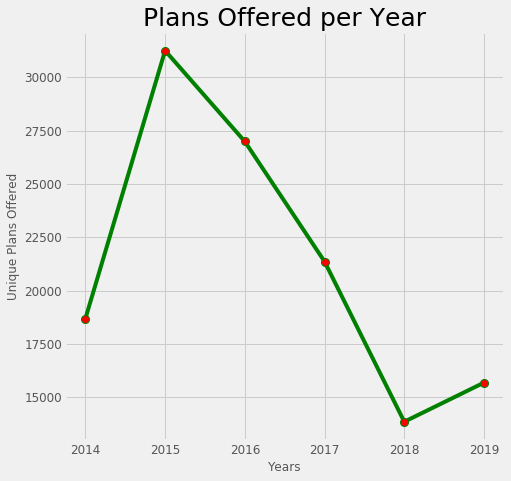

In [22]:
#Collecting the Unique PlanID for all the years of enrollment
plan_year = {year:len(plan_attr[plan_attr['BusinessYear'] == year]['PlanId'].unique()) for year in plan_attr['BusinessYear'].unique()}
print(plan_year)
#Plot the Year-Plan to check how the number of plans ooffered every year
plt.figure(figsize=(7,7))
plt.plot(pd.Series(plan_year),color='green',marker='o',markerfacecolor='red',markersize=8)
plt.xlabel('Years',fontsize=12,)
plt.ylabel('Unique Plans Offered',fontsize=12)
plt.title('Plans Offered per Year',fontsize=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
plan_metal_level = plan_attr.groupby(['StateCode','MetalLevel'])['PlanId'].count().unstack()
plan_metal_level

MetalLevel,Bronze,Catastrophic,Expanded Bronze,Gold,High,Low,Platinum,Silver
StateCode,,,,,,,,
AK,219.0,10.0,28.0,156.0,197.0,123.0,NaN,410.0
AL,113.0,31.0,10.0,118.0,206.0,219.0,50.0,217.0
AR,257.0,48.0,12.0,271.0,147.0,133.0,NaN,697.0
AZ,717.0,145.0,72.0,795.0,325.0,356.0,258.0,1730.0
DE,130.0,12.0,4.0,170.0,136.0,165.0,15.0,270.0
FL,1377.0,148.0,184.0,1566.0,286.0,426.0,856.0,3477.0
GA,1142.0,100.0,98.0,789.0,374.0,400.0,246.0,2537.0
HI,54.0,8.0,15.0,84.0,27.0,54.0,56.0,163.0
IA,592.0,63.0,30.0,341.0,221.0,172.0,94.0,1125.0


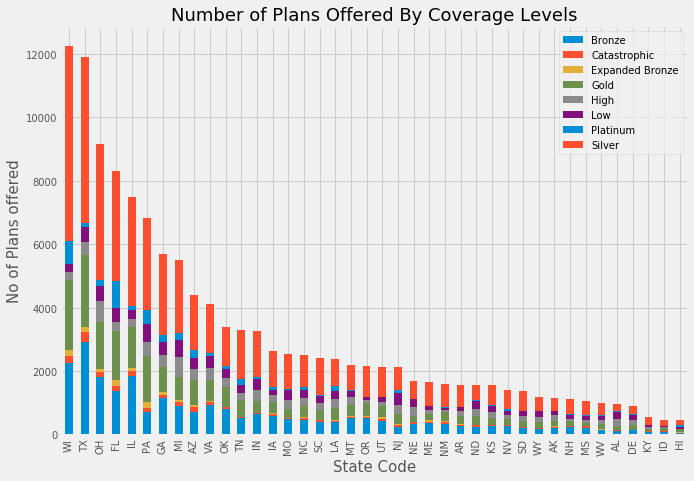

<Figure size 432x288 with 0 Axes>

In [25]:
plan_metal_level['Total'] = plan_metal_level[['Bronze', 'Catastrophic', 'Gold', 'Platinum',
                                          'Silver','High','Low']].sum(axis=1)
plan_metal_level.sort_values(by=['Total'], ascending=False, inplace=True)
plan_metal_level.drop(['Total'], axis=1, inplace=True)

plan_metal_level.plot(kind='bar', figsize=(10,7), stacked=True, fontsize=16)                  
plt.title("Number of Plans Offered By Coverage Levels", fontsize=18 )
plt.ylabel("No of Plans offered", fontsize=15)
plt.xlabel("State Code", fontsize=15)
plt.legend(fontsize=10,loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig('Number of Plans Offered by Coverage Levels.png')



# Merging the Plan Attribute Data with Plan Rate Data 
I will load the Plan Attribute Data for all years and then Merge it with plan rates dataset.
Then will try to answer some Questions pertaining to Plan Attributes and analyse how Plan attributes contribute to the Plabe Rates across States.

In [26]:
print(plan_attr['PlanId'].head(3))
print(rate['PlanId'].head(3))
# Plan attribute plan id  has an extra 2 bytes, so we need to substring the plan attribute plan id before we can merge
# 2 datasets together
plan_attr['PlanId'] = plan_attr['PlanId'].str[:14]
print(plan_attr['PlanId'].head(3))

0    21989AK0020002-00
1    21989AK0020002-01
2    21989AK0020001-00
Name: PlanId, dtype: object
0    21989AK0010001
1    21989AK0020001
2    21989AK0020001
Name: PlanId, dtype: object
0    21989AK0020002
1    21989AK0020002
2    21989AK0020001
Name: PlanId, dtype: object


In [27]:
# Merge two datasets: plan_rates
plan_rates = rate.join(plan_attr.set_index(['BusinessYear','StateCode','PlanId']), on=['BusinessYear','StateCode','PlanId'], how = 'inner')

In [29]:
plan_rates.reset_index(inplace=True)

In [30]:
plan_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46896218 entries, 0 to 46896217
Data columns (total 24 columns):
index                                        int64
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float

The dataset has 2 types of plans:
1. Dental Plan 
2. Medical Plan
We will analyse both the plans separately

In [31]:
# Exclude dental plans: medical_only
medical_only = plan_rates[(plan_rates['MetalLevel'] != 'High') & 
                              (plan_rates['MetalLevel'] != 'Low')]
# only dental plans: dental_only
dental_only = plan_rates[(plan_rates['MetalLevel'] == 'High') | 
                         (plan_rates['MetalLevel'] == 'Low')]

Now we will see how premium varies according to the metal level(coverage) in each state

In [32]:
statewise_rate_med = medical_only.groupby(['StateCode','MetalLevel']).IndividualRate.mean().unstack() 
statewise_rate_den = dental_only.groupby(['StateCode','MetalLevel']).IndividualRate.mean().unstack() 

**We can see that maximum premium is charged by AK in Medical plan and Cheapest plans are offered by ID**

**In Dental plan IH seems to be charging way too high than other states**

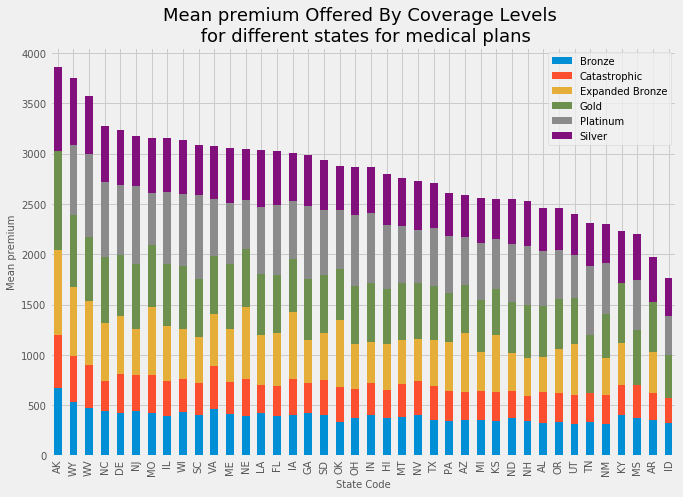

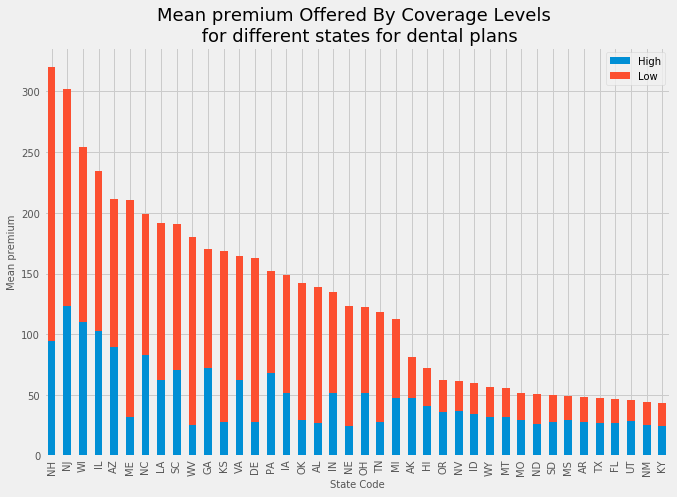

<Figure size 432x288 with 0 Axes>

In [33]:
statewise_rate_med['Total'] = statewise_rate_med[['Bronze', 'Catastrophic', 'Gold', 'Platinum','Silver','Expanded Bronze']].sum(axis=1)
statewise_rate_med.sort_values(by=['Total'], ascending=False, inplace=True)
statewise_rate_med.drop(['Total'], axis=1, inplace=True)

statewise_rate_den['Total'] = statewise_rate_den[['Low', 'High']].sum(axis=1)
statewise_rate_den.sort_values(by=['Total'], ascending=False, inplace=True)
statewise_rate_den.drop(['Total'], axis=1, inplace=True)

statewise_rate_med.plot(kind='bar', figsize=(10,7), stacked=True, fontsize=16)                  
plt.title("Mean premium Offered By Coverage Levels \n for different states for medical plans", fontsize=18 )
plt.ylabel("Mean premium", fontsize=10)
plt.xlabel("State Code", fontsize=10)
plt.legend(fontsize=10,loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


statewise_rate_den.plot(kind='bar', figsize=(10,7), stacked=True, fontsize=16)                  
plt.title("Mean premium Offered By Coverage Levels \n for different states for dental plans", fontsize=18 )
plt.ylabel("Mean premium", fontsize=10)
plt.xlabel("State Code", fontsize=10)
plt.legend(fontsize=10,loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig('Mean premium Offered by Coverage levels for different states')

We have already checked how plan rates vary by age for different years. Now we will analyse how rates vary by age for different 
plan categories

In [34]:
# Calculate the average of medical individual rate in each metal of each age group
age_indi_mean_m = medical_only[medical_only['Age']!='Family Option'].groupby(['Age','MetalLevel'])['IndividualRate'].mean().unstack()
# Calculate the average of Dental individual rate in each metal of each age group
age_indi_mean_d = dental_only[dental_only['Age']!='Family Option'].groupby(['Age','MetalLevel'])['IndividualRate'].mean().unstack()

# Observation from below Visualization
1. As expected Platinum plan category is expensive
2. Bronze plan catgory is not the least expensive. Catastrophic plans are for specific needs only so they are cheaper but covers few benefits only
3. The variations at the ends of both graphs are due to the policy changes in the year 2017. Age limit for Old enrolees is changed from 64 to 65. Policies for children is reduced from 20 to 15.
4. Delta Plans has very little variations with Age after 20 years. Catgory 'Low' is quite double the category 'High' 

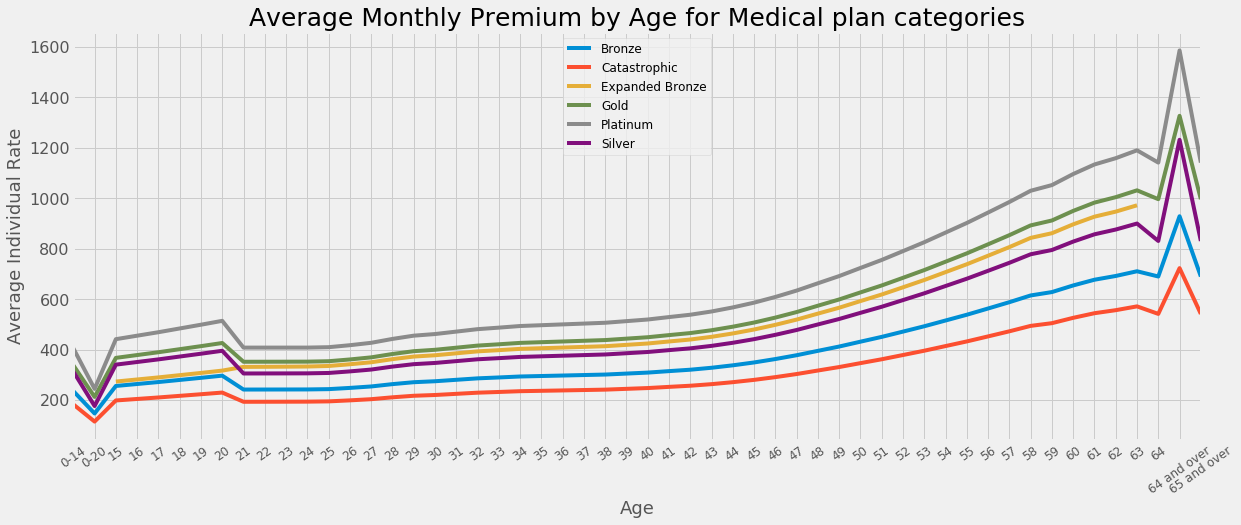

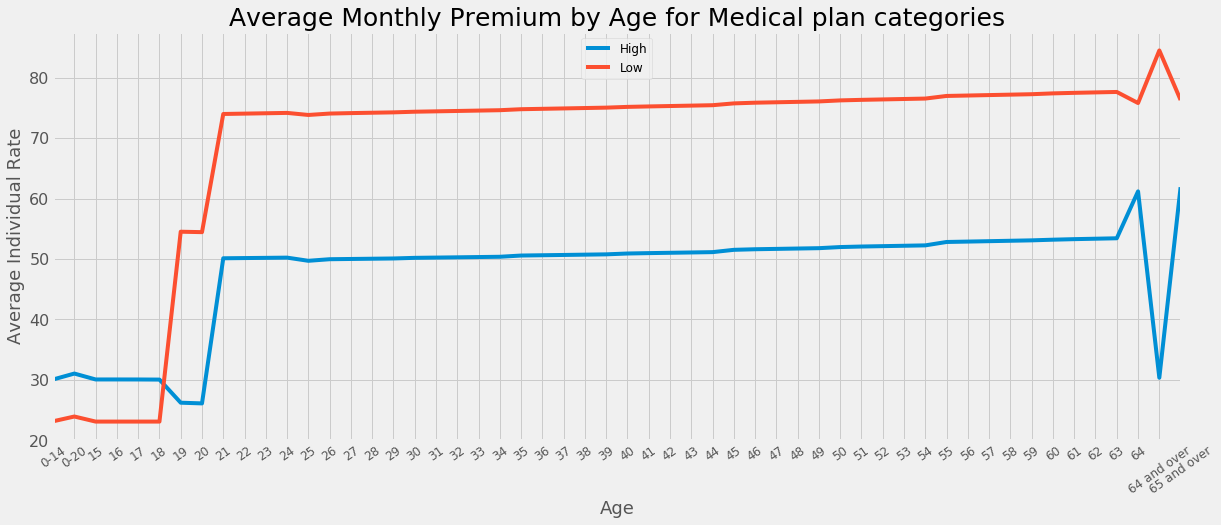

In [35]:
# ploting the age and average monthly individual rate relationship for different plan categories
age_indi_mean_m.plot(figsize=(18,7), fontsize=16)
plt.title("Average Monthly Premium by Age for Medical plan categories", fontsize=25)
plt.ylabel("Average Individual Rate", fontsize=18)
plt.xlabel('Age',fontsize=18)
#Xticks are not comin auto in current version of Pandas, so need to work around on it
plt.xticks(list(range(len(rate_age_year.index))),rate_age_year.index, fontsize=12,rotation=35)
plt.legend(fontsize=12,loc='upper center')
plt.show()

age_indi_mean_d.plot(figsize=(18,7), fontsize=16)
plt.title("Average Monthly Premium by Age for Medical plan categories", fontsize=25)
plt.ylabel("Average Individual Rate", fontsize=18)
plt.xlabel('Age',fontsize=18)
#Xticks are not comin auto in current version of Pandas, so need to work around on it
plt.xticks(list(range(len(rate_age_year.index))),rate_age_year.index, fontsize=12,rotation=35)
plt.legend(fontsize=12,loc='upper center')
plt.show()

# OutOfPocket Analysis
For any plan OutOfPocket is the amount which everyonse should care about. Apart from Monthly Premium, population has to fetch out extra amount for every Service he/she takes.
Lets see how they are different for In Network and Out Network. We are going to look into EHB benefits for all the plans

We will use KDE to analyse it.

In [31]:
tehb_data = plan_rates[(plan_rates['Age'] != 'Family Option') & (plan_rates['MetalLevel'] != 'High') & (plan_rates['MetalLevel'] != 'Low')]

In [32]:
tehb_data.shape

(20220117, 24)

# Observations

As the KDE chart shows, lots of plan limits are 0, that means these plans are for the poor people who need help. And we can find that most limits are more than 12000, that means the U.S. insurance issurers like focusing on high-end plan products. Maybe that's why Americans usually spend loads of money on their health insurance.

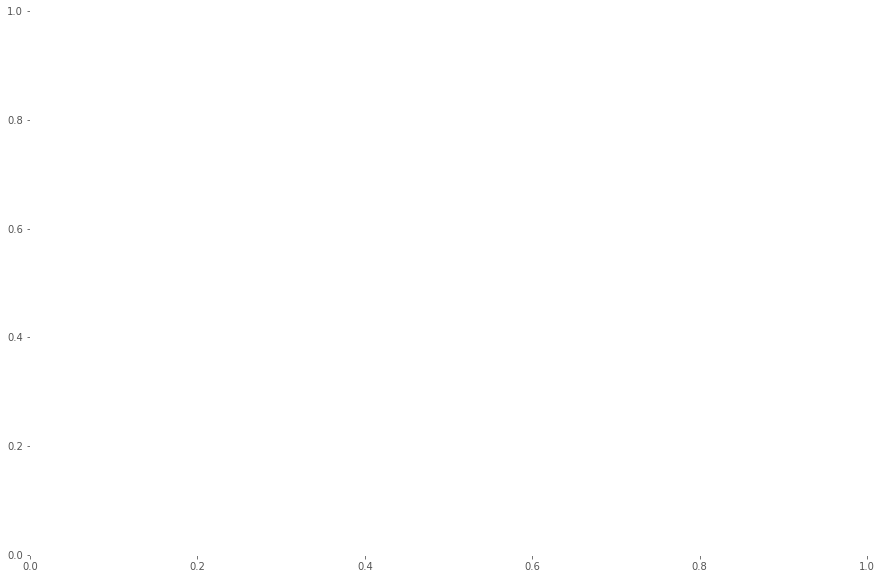

In [33]:
#fig, ax = plt.subplots(figsize=(15,10))
#tehb_data.TEHBInnTier1IndividualMOOP.hist(bins=30, density
#                                          =True, alpha=0.4, color='grey')
#tehb_data.TEHBInnTier1IndividualMOOP.plot(kind='kde', title='Individual Out Of Pocket', label='KDE pandas')
#sns.kdeplot(tehb_data.TEHBInnTier1IndividualMOOP, bw=20, color='black', lw=1.0, label='KDE seaborn')
#plt.xlim([0,13500])

# Now I will load the Benefit Cost sharing Dataset and analyse it.

**1. BenefitCostSharing:** <br>
This is the dataset which will have all the data related to benefits and how the cost is shared for each benefits.<br>
Below are the columns of this dataset which will be used in this project. For more information please refer to the http://www.nber.org/cciio/marketplace-puf/2018/bencs2018.pdf <br>


|Variable Name|Data Type|Varible defination|
|--------------|----------|-------------------|
|BenefitName   |Text      |Name assigned to benefit|
|StateCode |Text|Two-character state abbreviation indicating the state where the plan is offered|
|BusinessYear|Text|Year for which plan provides coverage to enrollees|

In [36]:
# Read the merged benefits dataset 
bcs = pd.read_csv('merged_benefits.csv')

In [37]:
bcs.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,StandardComponentId,PlanId,BenefitName,IsEHB,IsCovered,QuantLimitOnSvc,EHBVarReason,CopayInnTier1Value,CopayInnTier1Unit,CopayInnTier2Value,CopayInnTier2Unit,CopayOutofNetValue,CopayOutofNetUnit,CoinsInnTier1Value,CoinsInnTier2Value,CoinsOutofNetValue
0,0,2014,AK,21989,21989AK0010001,21989AK0010001-00,Routine Dental Services (Adult),No,Covered,Yes,Above EHB,0.0,Copay after deductible,-1.0,Not Covered,0.0,Copay after deductible,0.2,-0.01,0.2
1,1,2014,AK,21989,21989AK0010001,21989AK0010001-00,Dental Check-Up for Children,Yes,Covered,Yes,Substantially Equal,0.0,Copay after deductible,-1.0,Not Covered,0.0,Copay after deductible,0.2,-0.01,0.2
2,2,2014,AK,21989,21989AK0010001,21989AK0010001-00,Basic Dental Care - Child,Yes,Covered,No,Substantially Equal,0.0,Copay after deductible,-1.0,Not Covered,0.0,Copay after deductible,0.4,-0.01,0.4


In [38]:
#Dropping the Unnamed column
bcs.drop('Unnamed: 0',axis=1,inplace=True)

In [39]:
# I will check unique plans offered in United States since ACA commenced
unique_plan = bcs.BenefitName.nunique()
print("Unique plan offered to Americans:",unique_plan)
print("Number of states participated in the Exchange program:",bcs.StateCode.nunique())

Unique plan offered to Americans: 981
Number of states participated in the Exchange program: 40


Over the period of 6 years, American were offered 981 unique benefits. Interestingly not all the 50 states have participated in the marketplace or Exchange. For example California, New york.
States who are not participating in the federal run marketplace they have their own state run exchange. There are actually only 39 states who are using federal run health insurance marketplace. Idaho moved to state run marketplace after the first year of enrollment. And state run marketplace of Kentucky was dismentalled in year 2016 and joined federal run exchange. The above number 40 is the number of states who were/are associated with federal run exchange since its inception.

In [40]:
# List of benefit type topping the chart in a given business year
bcs[['BusinessYear','BenefitName']].groupby('BusinessYear').describe()

# There is no surprises that top of the Benefits offered are of Dental 

BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1774255    421              Orthodontia - Adult  26997
2017             1324275    281  Routine Dental Services (Adult)  21371
2018              829652    252  Routine Dental Services (Adult)  13857
2019              967050    244        Major Dental Care - Adult  15695

In [41]:
# Merge two datasets: plan_rates
plan_benefits = bcs.join(plan_attr.set_index(['BusinessYear','StateCode','PlanId']), on=['BusinessYear','StateCode','PlanId'], how = 'left')

In [42]:
# Exclude dental plans: medical_only
medical_only_plan_benefits = plan_benefits[(plan_benefits['MetalLevel'] != 'High') & 
                              (plan_benefits['MetalLevel'] != 'Low')]
# only dental plans: dental_only

dental_only_plan_benefits = plan_benefits[(plan_benefits['MetalLevel'] == 'High') | 
                         (plan_benefits['MetalLevel'] == 'Low')]

# Observations
1. few of the benefits are still in the Medical Benfit plan as they are the plans which give both Dental as well as Medical

2. Number of Medical plans decreases from the year of inception

3. Maximum number of plans were offered in 2015 but by 2019 it was reduced to 193 from 387, almost 50% reduction.

4. Same reduction is in Dental care as well.

5. This is not a good sign of the marketplace!!


In [50]:
# List of benefit type topping the chart in a given business year
print('Medical Plan benfits overview')
print(medical_only_plan_benefits[['BusinessYear','BenefitName']].groupby('BusinessYear').describe())

Medical Plan benfits overview
             BenefitName                                               
                   count unique                              top   freq
BusinessYear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1774255    421              Orthodontia - Adult  26997
2017             1324275    281  Routine Dental Services (Adult)  21371
2018              829652    252  Routine Dental Services (Adult)  13857
2019              967050    244        Major Dental Care - Adult  15695


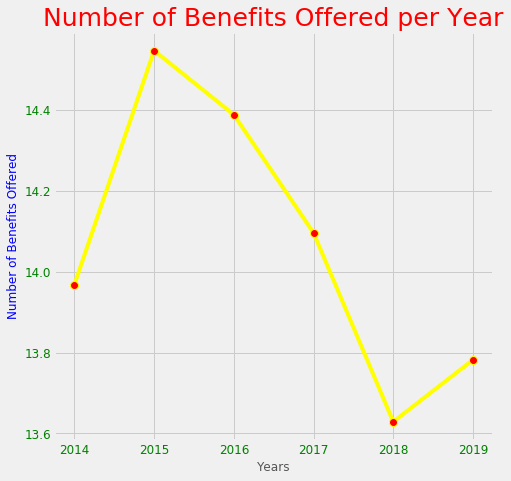

In [51]:
# Lets view the above results in a graph
plt.figure(figsize=(7,7))
dental = dental_only_plan_benefits[['BusinessYear','BenefitName']].groupby('BusinessYear')['BenefitName'].count()
dental = np.log(dental)
plt.plot(dental,color='green',marker='o',markerfacecolor='red',markersize=8)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Number of Benefits Offered',fontsize=12,color='b')
plt.title('Number of Benefits Offered per Year',fontsize=25,color='r')
plt.xticks(fontsize=12,color='g')
plt.yticks(fontsize=12,color='g')


medical = medical_only_plan_benefits[['BusinessYear','BenefitName']].groupby('BusinessYear')['BenefitName'].count()
medical = np.log(medical)
plt.plot(medical,color='yellow',marker='o',markerfacecolor='red',markersize=8)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Number of Benefits Offered',fontsize=12,color='b')
plt.title('Number of Benefits Offered per Year',fontsize=25,color='r')
plt.xticks(fontsize=12,color='g')
plt.yticks(fontsize=12,color='g')

plt.show()

In [45]:
# Lets see how many benefits are available statewise.
bcs[['StateCode','BenefitName']].groupby('StateCode').count().sort_values('BenefitName')
uniq_state = bcs.StateCode.unique()
benefits = []

for state in uniq_state:
    state_benefit = len(bcs[bcs['StateCode'] == state])
    benefits.append(state_benefit)

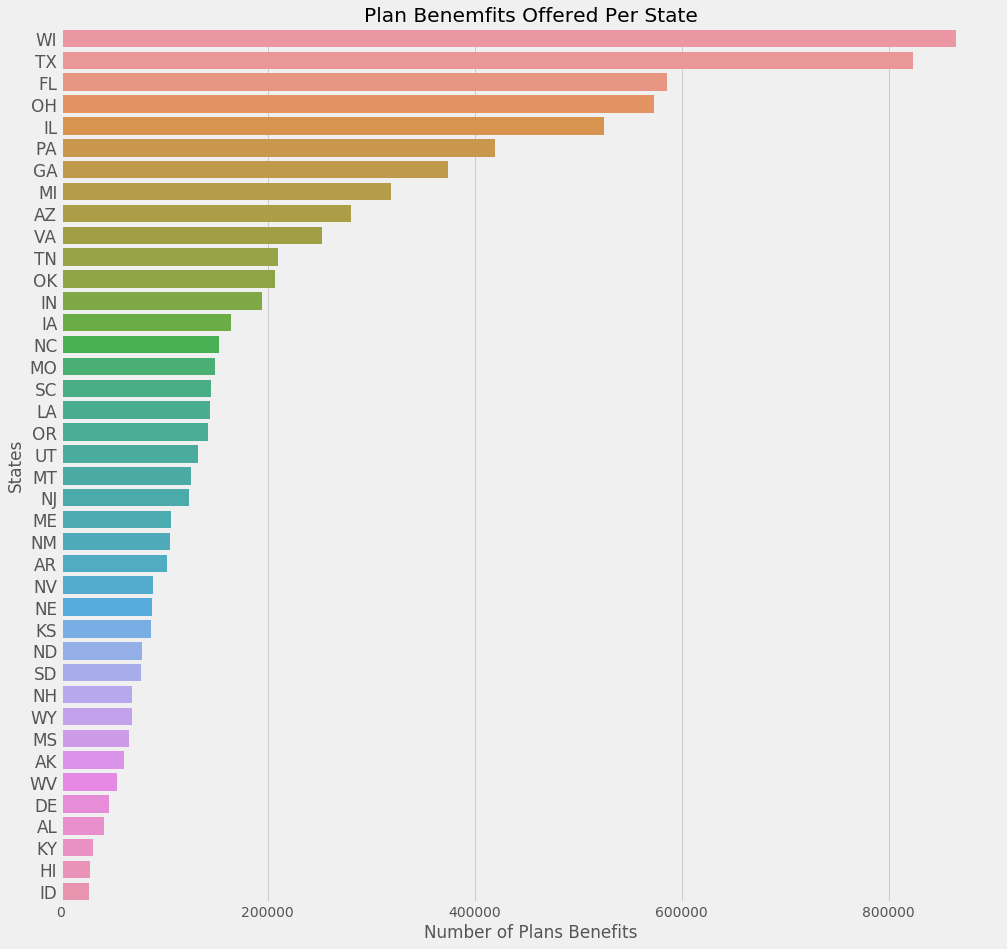

In [47]:
df = pd.DataFrame(
    {'state': uniq_state,
     'Count' : benefits
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.ylabel('States')
plt.xlabel('Number of Plans Benefits')
plt.title('Plan Benemfits Offered Per State')
plt.show()

In [48]:
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [54]:
df

,state,Count
0,WI,864853
1,TX,823470
2,FL,585724
3,OH,573361
4,IL,524972
5,PA,419860
6,GA,374534
7,MI,318865
8,AZ,280580
9,VA,252606


In [49]:
data = dict(type = 'choropleth',
               z = df['Count'],
               autocolorscale=False,
               colorbar={'title':'No of Benefit plans'},
               colorscale=[[0.0, 'rgb(242,240,247)'], [0.2, 'rgb(218,218,235)'], [0.4, 'rgb(188,189,220)'], [0.6, 'rgb(158,154,200)'], [0.8, 'rgb(117,107,177)'], [1.0, 'rgb(84,39,143)']],
               hoverinfo='location+z',
               locations = df['state'],
               locationmode = 'USA-states',
               text = df['state'],
               marker = dict(line=dict(color='rgb(255,255,255)', width=2))
            )

layout = dict(title = 'Benefit plan spread across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

fig = go.Figure(data=[data], layout=layout)

#py.iplot(fig)
iplot(fig)

So we can say that Wisconsin(WI) offers most number of benefit plans to the population and Texas is second. In the above map the darker the color the more number of benefits offered. Hover the mouse on the state to find out the number of benefits offered in that particular state. 
Also notice that not all the states are using the Exchange run by Federal Government. The complete white states are representing those states. There are only 39 states who are offering benefits using exchange.

# Summary of Analysis

In the whole analysis I have tried to figure out how Plans, benefits and rates are related to each other and how they are spread among all the states. 

There are 40 states who have participated in the Exchange program and California is the biggest state which has not participated in any of these years. In the coming year if Calfiornia participated in the Exchange programs then it will be a huge opportunity for the companies, as California has maximum population to target

As the the exchange program getting older, number of plans and benefits are decreasing. This is a huge concern for ACA initiative. 

Wisconsin gives maximum number of benefits to choose from and has reasonable Monthly premium. It suggests that Wisconsin state is a huge success for ACA initiative.

Alaska offers minimum number of Benefits and premium is super expensive as compared to other States. It might be due it harsh conditions and small population to deal with. 

Huge premium will need to be paid if a user is Smoker. It is a good pentalty imposed on people who are living Unhealthy life.


# Next we will apply some machine learning algorithm to predict premium rates for 2020.